## **First import pandas then load dataset**

In [1]:
import pandas as pd

## Step 1: Load DataSet.

In [2]:
data_base= pd.read_csv("Big_basket_products.csv")

## Step 2: Use head function to look for first 12 rows.

In [3]:
data_base.head(12)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
5,6,Germ - Removal Multipurpose Wipes,Cleaning & Household,All Purpose Cleaners,Nature Protect,169.0,199.0,Disinfectant Spray & Cleaners,3.3,Stay protected from contamination with Multipu...
6,7,Multani Mati,Beauty & Hygiene,Skin Care,Satinance,58.0,58.0,Face Care,3.6,Satinance multani matti is an excellent skin t...
7,8,Hand Sanitizer - 70% Alcohol Base,Beauty & Hygiene,Bath & Hand Wash,Bionova,250.0,250.0,Hand Wash & Sanitizers,4.0,70%Alcohol based is gentle of hand leaves skin...
8,9,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,1098.0,1098.0,Shampoo & Conditioner,3.5,"An exclusive blend with Vitamin B7 Biotin, Hyd..."
9,10,"Scrub Pad - Anti- Bacterial, Regular",Cleaning & Household,"Mops, Brushes & Scrubs",Scotch brite,20.0,20.0,"Utensil Scrub-Pad, Glove",4.3,Scotch Brite Anti- Bacterial Scrub Pad thoroug...


## Step 3: Get Description of the data in the DataFrame.

NOTE: i do not want to show index column so i used [[]]

In [4]:
data_base[["sale_price", "market_price","rating"]].describe()

,sale_price,market_price,rating
count,27549.000000,27555.000000,18919.000000
mean,334.648391,382.056664,3.943295
std,1202.102113,581.730717,0.739217
min,2.450000,3.000000,1.000000
25%,95.000000,100.000000,3.700000
50%,190.320000,220.000000,4.100000
75%,359.000000,425.000000,4.300000
max,112475.000000,12500.000000,5.000000


## Step 4: Find Information about the DataFrame.

In [5]:
data_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27549 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18919 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


## Step 5: Find out Top &amp; least sold products.

### **Top Sold Product**

In [20]:
data_base["product"].value_counts().head()

product
Turmeric Powder/Arisina Pudi    26
Extra Virgin Olive Oil          15
Cow Ghee/Tuppa                  14
Olive Oil - Extra Virgin        12
Soft Drink                      12
Name: count, dtype: int64

### **Least Sold Product**

In [19]:
data_base["product"].value_counts().tail()

product
Dove Plastic Soap Case - Assorted Colour                     1
Detoxifying Mineral Pack                                     1
Salted Pumpkin                                               1
Plastic Hook/Hanger Card Self Adhesive/Stickable - BH 048    1
Water Bottle - Orange                                        1
Name: count, dtype: int64

## Step 6: Measuring discount on a certain item.

In [22]:
data_base["discount"]=data_base["market_price"]-data_base["sale_price"]

In [25]:
data_base["discount_percentage"]=(data_base["discount"]/data_base["market_price"])*100

## Step 7: Find out the Missing Values from the Dataset.

In [8]:
data_base.isnull().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         6
market_price       0
type               0
rating          8636
description      115
dtype: int64

## Step 8: Find out the outliers from the dataset according to the columns and fill them with the mean.

In [1]:
def treat_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    column = np.where(column < lower, column.mean(), column)
    column = np.where(column > upper, column.mean(), column)
    return column

## Step 9: Create Plots or visualizations

In [28]:
import matplotlib.pyplot as plt

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import seaborn as sns

🔹 1. Price Distribution

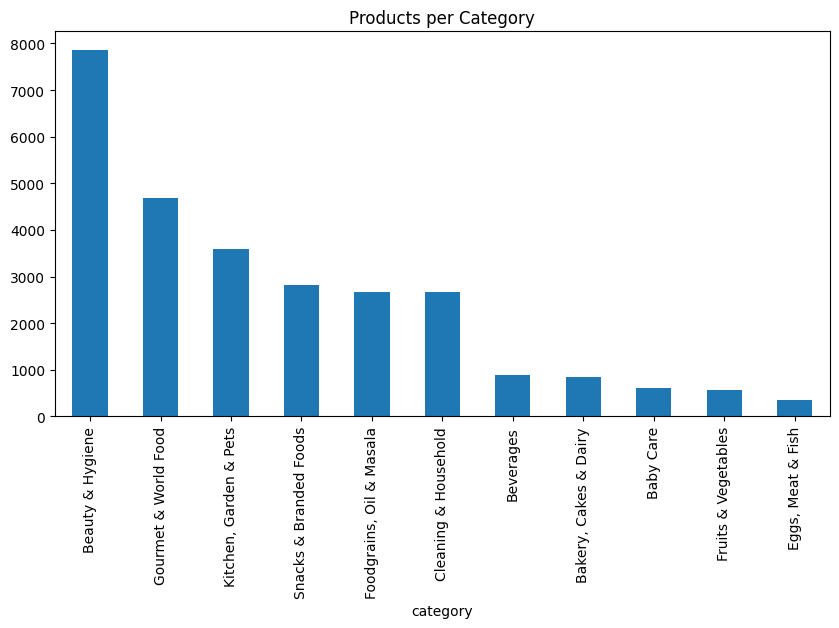

In [31]:
plt.figure(figsize=(10,5))
data_base['category'].value_counts().plot(kind='bar')
plt.title("Products per Category")
plt.show()

🔹 2. Rating Distribution

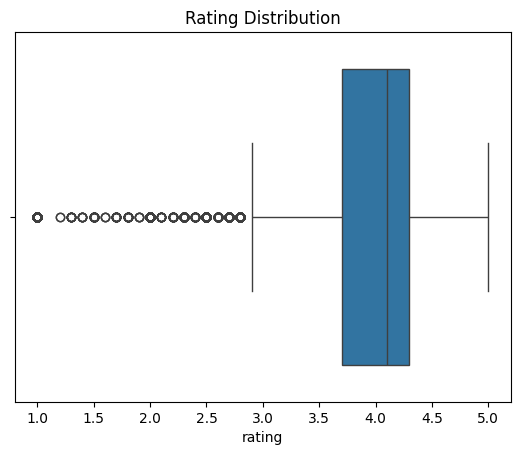

In [34]:
plt.figure()
sns.boxplot(x=data_base['rating'])
plt.title("Rating Distribution")
plt.show()

3. Brand-wise Product Coun

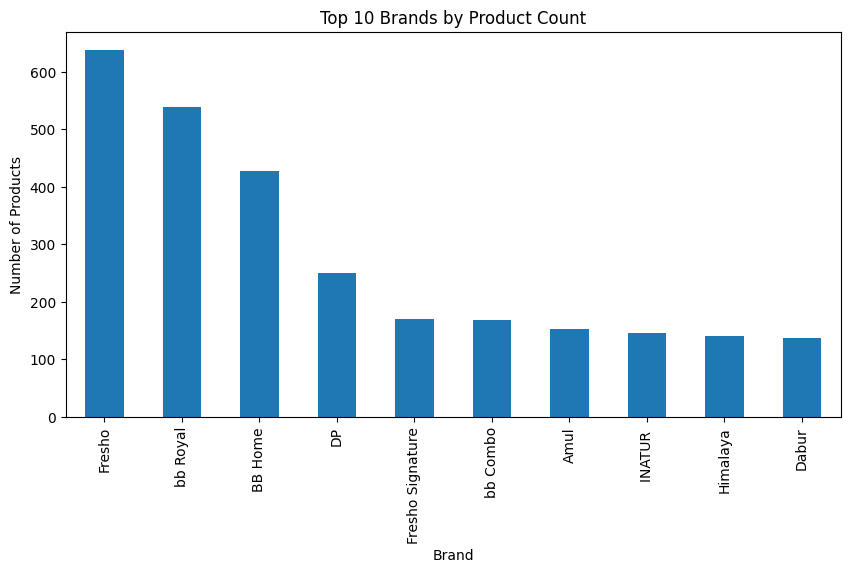

In [37]:
plt.figure(figsize=(10,5))
data_base['brand'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Brands by Product Count")
plt.xlabel("Brand")
plt.ylabel("Number of Products")
plt.show()

🔹 4. Average Sale Price by Category


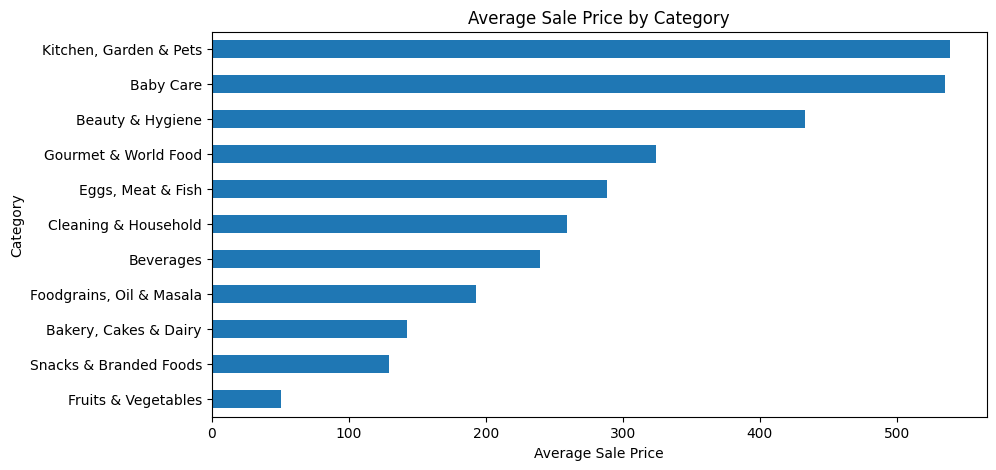

In [38]:


plt.figure(figsize=(10,5))
data_base.groupby('category')['sale_price'].mean().sort_values().plot(kind='barh')
plt.title("Average Sale Price by Category")
plt.xlabel("Average Sale Price")
plt.ylabel("Category")
plt.show()